Installation of tensorflow object detection api

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cd /content/drive/MyDrive/Detection/PPE_Violation_Detection/ 
# !git clone https://github.com/tensorflow/models

Cloning into 'models'...


In [ ]:
%%bash
pip install -U --pre tensorflow=="2.5"
pip install tf_slim
pip install pycocotools

In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/PPE_Violation_Detection/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .

In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/PPE_Violation_Detection/models/research/
pip install .

Processing /content/drive/MyDrive/Detection/PPE_Violation_Detection/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1658497 sha256=24c8e05483ac63a6d15fd302825f39e3e8f09e5bb38e1691468ad278325904d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6p6pis__/wheels/72/eb/cc/7ad52af1b1860f0f63422f9424b9d954a1903ec32e96dcf507
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=6cf3f05675d9a16901fb63ee5f26049d18869fdd48aa35f846a6c4a5885fd5fa
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=e0fbd80f47d0456c9899eb3c1055a4269add9ac96a4844f651327b032bc1c384
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78545 sha256=6c0d

ERROR: multiprocess 0.70.12.2 has requirement dill>=0.3.4, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.26.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.31.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/PPE_Violation_Detection/models/research/
python object_detection/builders/model_builder_tf2_test.py

9412608/9406464 [==============================] - 0s 0us/step


2021-07-19 08:14:49.498388: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-19 08:14:52.245061: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 08:14:52.352011: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-19 08:14:52.352074: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b88911f99e43): /proc/driver/nvidia/version does not exist
W0719 08:14:52.584289 140412709992320 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.64s
I0719 08:14

# 0. Setup Paths

In [ ]:
%ls

drive/  sample_data/


In [ ]:
WORKSPACE_PATH = '/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace'
APIMODEL_PATH = '/content/drive/MyDrive/Detection/PPE_Violation_Detection/models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'

# 1. Create Label Map

In [ ]:
labels = [{'name':'Helmet', 'id':1}, 
            {'name':'Jacket', 'id':2},
            {'name':'Mask', 'id':3}, 
            {'name':'No-helmet', 'id':4},
            {'name':'No-jacket', 'id':5}, 
            {'name':'No-mask', 'id':6},
            {'name':'gloves', 'id':7}, 
            {'name':'shoes', 'id':8}]

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 2. Create TF records

In [ ]:
%ls

drive/  sample_data/


In [ ]:
!python /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/images/train_labels.csv --image_dir=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/images/train/ --output_path=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/annotations/train.record
!python /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/images/test_labels.csv --image_dir=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/images/test/ --output_path=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/annotations/test.record


2021-07-18 16:47:57.170659: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/annotations/train.record
2021-07-18 16:49:46.897748: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/annotations/test.record


# 3. Download TF Models Pretrained Models from Tensorflow Model Zoo

In [ ]:
# !wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
# !mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRETRAINED_MODEL_PATH}
# !cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# 4. Copy Model Config to Training Folder

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [ ]:
# !mkdir {'/content/drive/MyDrive/Detection/hat_detection/workspace/models/'+CUSTOM_MODEL_NAME}
# !cp /content/drive/MyDrive/Detection/hat_detection/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet

mkdir: cannot create directory ‘/content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet’: File exists


# 5. Update Config For Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

NameError: ignored

In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/test.record"
 }
 ],
 'model': ssd {
   num_classes: 6
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.99999989895150

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = 8
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

Train

In [ ]:
!python /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/model_main_tf2.py --model_dir=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet --pipeline_config_path=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=15000

2021-07-19 08:15:59.590672: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-19 08:16:01.931611: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 08:16:01.943599: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-19 08:16:01.943655: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b88911f99e43): /proc/driver/nvidia/version does not exist
W0719 08:16:01.944670 140047249164160 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
W0719 08:16:01.944931 140047249164160 mirrored_strategy.py:379] Collective ops is not configured at program startup. Some performance features may not be enabled.
INFO:tensorflow:Using MirroredStrategy w

Evaluation

In [ ]:
!python /content/drive/MyDrive/Detection/PPE_Violation_Detection/models/research/object_detection/model_main_tf2.py  --model_dir=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet --pipeline_config_path=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet

2021-07-19 11:59:20.475848: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0719 11:59:22.962420 139758011680640 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0719 11:59:22.962705 139758011680640 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0719 11:59:22.962794 139758011680640 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0719 11:59:22.962878 139758011680640 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0719 11:59:22.962987 139758011680640 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-07-19 11:59:22.966650: I tensorflow/stream_executor/

Tensorboard

In [ ]:
# !tensorboard --logdir=/content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet

Export

In [33]:
!python /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/models/my_ssd_mobnet --output_directory /content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/exported-models/model

2021-07-19 14:01:41.866314: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-19 14:01:44.547237: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 14:01:44.559551: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-19 14:01:44.559663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b88911f99e43): /proc/driver/nvidia/version does not exist
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0719 14:01:44.738306 140458823763840 deprecation.py:601] From /usr/local/lib/python3.7/dist-packages/tensorflow

# 7. Load Train Model From Checkpoint

In [ ]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-16')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

# 8. Detect in From Photos

Running inference for /... 

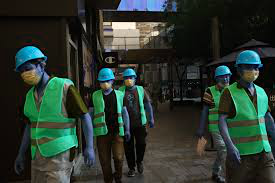

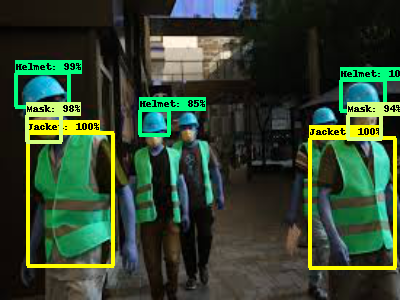

Done


In [32]:
import numpy as np
import cv2 
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow   # Suppress Matplotlib warnings

IMAGE_PATHS = '/'

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')
    image_path = '/content/drive/MyDrive/Detection/PPE_Violation_Detection/workspace/images/test/images.jpeg'
    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    image_np_with_detections = cv2.resize(image_np_with_detections, (400,300))

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=0.5,
            agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    cv2_imshow(image_np)
    cv2_imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2